In [ ]:
j!pip install -Uqq fastbook tornado==5.1


     |████████████████████████████████| 720 kB 5.9 MB/s 
     |████████████████████████████████| 516 kB 21.9 MB/s 
     |████████████████████████████████| 188 kB 44.9 MB/s 
     |████████████████████████████████| 1.2 MB 51.6 MB/s 
     |████████████████████████████████| 49 kB 5.1 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 51 kB 213 kB/s 
     |████████████████████████████████| 561 kB 39.6 MB/s 
     |████████████████████████████████| 130 kB 48.4 MB/s 
     |████████████████████████████████| 130 kB 47.4 MB/s 
     |████████████████████████████████| 130 kB 46.4 MB/s 


In [ ]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
import numpy as np
import os 
import cv2
import pandas as pd
import matplotlib.pyplot as plt
# "/content/gdrive/MyDrive/CNN Model/chest_xray/train"

def ImportData(Data_Directory, IMG_SIZE):
#Importing the Training Data

  DataDir = Data_Directory
  CATEGORIES = ["NORMAL", "PNEUMONIA"]
  training_data = []

  for category in CATEGORIES:
      path = os.path.join(Data_Directory, category)
      class_num = CATEGORIES.index(category)
      for img in os.listdir(path):
          img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])

  np.random.shuffle(training_data)

  X = []
  Y = []

  for inputs, labels in training_data:
      X.append(inputs)
      Y.append(labels)

  return np.array(X), np.array(Y)

In [ ]:
x_train, y_train = ImportData("/content/gdrive/MyDrive/CNN Model/chest_xray/train",200)

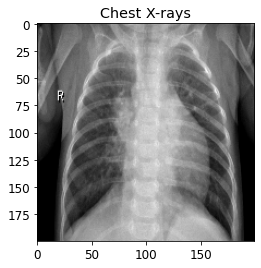

In [ ]:
# creating a plot
pixel_plot = plt.figure()
  
# plotting a plot
pixel_plot.add_axes()
  
# customizing plot
plt.title("Chest X-rays")
pixel_plot = plt.imshow(x_train[0], cmap='gray')

In [ ]:
print(y_train.shape)

(5216,)


In [ ]:
def resize(x, y, rows): # changing from a 3D array to a 2D array
  x = x.reshape(rows, 200*200)
  y = y.reshape(rows,1)
  return x, y

In [ ]:
"""x_train, y_train = resize(x_train, y_train, 5216)
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)"""

In [ ]:
"""each column represents a grayscale pixel value. We turned our 3D array where the first index was a 
different image and the last two indexes were the 200X200 grey scale image to a 2D array where
each row is an image and each column is a pixel value.
x_train.head()"""

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,...,39501,39502,39503,39504,39505,39506,39507,39508,39509,39510,39511,39512,39513,39514,39515,39516,39517,39518,39519,39520,39521,39522,39523,39524,39525,39526,39527,39528,39529,39530,39531,39532,39533,39534,39535,39536,39537,39538,39539,39540,39541,39542,39543,39544,39545,39546,39547,39548,39549,39550,39551,39552,39553,39554,39555,39556,39557,39558,39559,39560,39561,39562,39563,39564,39565,39566,39567,39568,39569,39570,39571,39572,39573,39574,39575,39576,39577,39578,39579,39580,39581,39582,39583,39584,39585,39586,39587,39588,39589,39590,39591,39592,39593,39594,39595,39596,39597,39598,39599,39600,39601,39602,39603,39604,39605,39606,39607,39608,39609,39610,39611,39612,39613,39614,39615,39616,39617,39618,39619,39620,39621,39622,39623,39624,39625,39626,39627,39628,39629,39630,39631,39632,39633,39634,39635,39636,39637,39638,39639,39640,39641,39642,39643,39644,39645,39646,39647,39648,39649,39650,39651,39652,39653,39654,39655,39656,39657,39658,39659,39660,39661,39662,39663,39664,39665,39666,39667,39668,39669,39670,39671,39672,39673,39674,39675,39676,39677,39678,39679,39680,39681,39682,39683,39684,39685,39686,39687,39688,39689,39690,39691,39692,39693,39694,39695,39696,39697,39698,39699,39700,39701,39702,39703,39704,39705,39706,39707,39708,39709,39710,39711,39712,39713,39714,39715,39716,39717,39718,39719,39720,39721,39722,39723,39724,39725,39726,39727,39728,39729,39730,39731,39732,39733,39734,39735,39736,39737,39738,39739,39740,39741,39742,39743,39744,39745,39746,39747,39748,39749,39750,39751,39752,39753,39754,39755,39756,39757,39758,39759,39760,39761,39762,39763,39764,39765,39766,39767,39768,39769,39770,39771,39772,39773,39774,39775,39776,39777,39778,39779,39780,39781,39782,39783,39784,39785,39786,39787,39788,39789,39790,39791,39792,39793,39794,39795,39796,39797,39798,39799,39800,39801,39802,39803,39804,39805,39806,39807,39808,39809,39810,39811,39812,39813,39814,39815,39816,39817,39818,39819,39820,39821,39822,39823,39824,39825,39826,39827,39828,39829,39830,39831,39832,39833,39834,39835,39836,39837,39838,39839,39840,39841,39842,39843,39844,39845,39846,39847,39848,39849,39850,39851,398

In [ ]:
x_test, y_test = ImportData("/content/gdrive/MyDrive/CNN Model/chest_xray/test",200)
x_val, y_val = ImportData("/content/gdrive/MyDrive/CNN Model/chest_xray/val",200)

In [ ]:
"""x_test, y_test = resize(x_test, y_test, 624)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)"""

In [ ]:
"""x_val, y_val = resize(x_val, y_val, 16)
x_val = pd.DataFrame(x_val)
y_val = pd.DataFrame(y_val)"""

In [ ]:
"""Pre processing done. We now have panda data frames; x and y test, train and validation sets as 2D arrays where each row is a different image and each column is 
an individual grayscale pixel value between 0 and 255"""

'Pre processing done. We now have panda data frames; x and y test, train and validation sets as 2D arrays where each row is a different image and each column is \nan individual grayscale pixel value between 0 and 255'

In [ ]:
from keras.utils import np_utils

In [ ]:
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)
y_val = np_utils.to_categorical(y_val, 2)

In [ ]:
print(y_test)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [ ]:
from tensorflow import keras
from keras import layers
from keras.layers import Activation, Dense
from keras.models import Sequential 

In [ ]:
x_train, x_test = x_train/255, x_test/255

In [ ]:
print(x_train.shape)

(5216, 200, 200)


In [ ]:
input_shape = (200, 200, 1)

# the data, split between train and test sets


# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (5216, 200, 200, 1)
5216 train samples
624 test samples


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(2, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dropout (Dropout)           (None, 147456)            0

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val,y_val))

Epoch 1/15
41/41 [==============================] - 236s 6s/step - loss: 0.5803 - accuracy: 0.7333 - val_loss: 1764.9360 - val_accuracy: 0.5000
Epoch 2/15
41/41 [==============================] - 235s 6s/step - loss: 0.5721 - accuracy: 0.7429 - val_loss: 1557.3972 - val_accuracy: 0.5000
Epoch 3/15
41/41 [==============================] - 234s 6s/step - loss: 0.5571 - accuracy: 0.7429 - val_loss: 2503.4417 - val_accuracy: 0.5000
Epoch 4/15
 4/41 [=>............................] - ETA: 3:31 - loss: 0.5135 - accuracy: 0.7383

KeyboardInterrupt: ignored